In [2]:
import pandas as pd
import numpy as np

# import movies_metadata.csv file using panda
movies_metadata = pd.read_csv("~/Desktop/DS Project/DS Movie Files/movies_metadata.csv", dtype="unicode")

# set desired width when printing the first few rows of the data, so that we can have a better grasp of the dataset
pd.set_option('display.width', 300)
np.set_printoptions(linewidth=300)
pd.set_option('display.max_columns',30)

In [3]:
movies_metadata.drop(columns=['adult','belongs_to_collection','homepage','poster_path','tagline','video'],inplace=True)
print("\nThe columns of this data set are: ", movies_metadata.columns)
print("The dimension of the data table is: ", movies_metadata.shape)
print("\n", movies_metadata.head())


The columns of this data set are:  Index(['budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'], dtype='object')
The dimension of the data table is:  (45466, 18)

      budget                                             genres     id    imdb_id original_language               original_title                                           overview popularity                               production_companies                               production_countries  \
0  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862  tt0114709                en                    Toy Story  Led by Woody, Andy's toys live happily in his ...  21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]  [{'iso_3166_1': 'US', 'name': 'United States o...   
1  65000000  [{'id': 12, 'name': 'Adventur

In [4]:
# exploring columns and their corresponding data types
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   budget                45466 non-null  object
 1   genres                45466 non-null  object
 2   id                    45466 non-null  object
 3   imdb_id               45449 non-null  object
 4   original_language     45455 non-null  object
 5   original_title        45466 non-null  object
 6   overview              44512 non-null  object
 7   popularity            45461 non-null  object
 8   production_companies  45463 non-null  object
 9   production_countries  45463 non-null  object
 10  release_date          45379 non-null  object
 11  revenue               45460 non-null  object
 12  runtime               45203 non-null  object
 13  spoken_languages      45460 non-null  object
 14  status                45379 non-null  object
 15  title                 45460 non-null

In [5]:
# convert budget, revenue, vote_average, vote_count columns to float type from object type
cols = ['budget', 'revenue', 'vote_average', 'vote_count']
for col in cols:
    movies_metadata[col] = pd.to_numeric(movies_metadata[col], errors='coerce')

In [7]:
# filter out records that have 0 or NaN as values using Boolean conditionals, also filter out unreleased movies
filt = (movies_metadata['budget'] > 0) & (movies_metadata['revenue'] > 0) & (movies_metadata['vote_average'] > 0) \
        & (movies_metadata['vote_count'] > 0) & (movies_metadata['status'] == "Released")
movies_metadata = movies_metadata[filt]
movies_metadata.dropna(axis='index', how='any', subset=['budget','revenue','vote_average', 'vote_count'], inplace=True)
movies_metadata.drop(columns=['status', 'overview'], inplace=True)

In [16]:
# lets take a look at the data before continuing
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', None)
print(movies_metadata)

           budget                                                                                                                       genres      id    imdb_id original_language     original_title popularity  \
0      30000000.0                             [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]     862  tt0114709                en          Toy Story  21.946943   
1      65000000.0                            [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]    8844  tt0113497                en            Jumanji  17.015539   
3      16000000.0                                [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]   31357  tt0114885                en  Waiting to Exhale   3.859495   
5      60000000.0     [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]     9

In [15]:
print(movies_metadata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 0 to 45422
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5370 non-null   float64
 1   genres                5370 non-null   object 
 2   id                    5370 non-null   object 
 3   imdb_id               5370 non-null   object 
 4   original_language     5370 non-null   object 
 5   original_title        5370 non-null   object 
 6   popularity            5370 non-null   object 
 7   production_companies  5370 non-null   object 
 8   production_countries  5370 non-null   object 
 9   release_date          5370 non-null   object 
 10  revenue               5370 non-null   float64
 11  runtime               5369 non-null   object 
 12  spoken_languages      5370 non-null   object 
 13  title                 5370 non-null   object 
 14  vote_average          5370 non-null   float64
 15  vote_count          

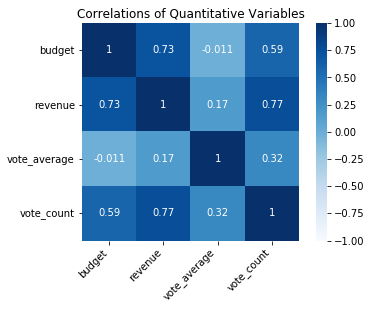

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# set up a correlation matrix heat map using Seaborn
corr = movies_metadata[cols].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlations of Quantitative Variables')
plt.show()

It seems like revenue has moderately strong positive correlations with budget and vote_count with correlation coefficients over 0.7. Budget and vote_count has a weaker positive correlation with 0.59.

I will start by segmenting the data into top 20% and bottom 20% of the total number of movies by revenue and provide details on common characteristics of the top and bottom movies.

In [37]:
eightieth = (np.percentile(movies_metadata['revenue'],80))
twentieth = (np.percentile(movies_metadata['revenue'],20))

print("The 80th percentile for movie revenues is (in USD):",eightieth)
print("The 20th percentile for movie revenues is (in USD):",twentieth)

The 80th percentile for movie revenues is (in USD): 127433878.19999996
The 20th percentile for movie revenues is (in USD): 4407462.399999999


In [45]:
top20_rev = movies_metadata[movies_metadata['revenue'] >= eightieth]
bot20_rev = movies_metadata[movies_metadata['revenue'] <= twentieth]

#compare mean and median, skewed data due to outliers...########
movies_metadata.describe()

,budget,revenue,vote_average,vote_count
count,5.370000e+03,5.370000e+03,5370.000000,5370.000000
mean,3.114676e+07,9.049464e+07,6.281322,733.776536
std,4.018597e+07,1.662661e+08,0.900005,1252.380375
min,1.000000e+00,1.000000e+00,1.000000,1.000000
25%,5.200000e+06,7.074610e+06,5.700000,77.250000
50%,1.700000e+07,3.000000e+07,6.300000,277.000000
75%,4.000000e+07,1.000000e+08,6.900000,803.500000
max,3.800000e+08,2.787965e+09,9.100000,14075.000000


In [24]:
# Lets explore the proportions of movies with different languages
languages = {}

for lang in movies_metadata['original_language']:
    if lang not in languages:
        languages[lang] = 1
    elif lang in languages:
        languages[lang] += 1

# I'll sort the language dictionary and take a look at the top 10 languages
sorted_languages = sorted(languages.items(), key=lambda x: x[1], reverse=True)
print(sorted_languages)

top10_languages = {}
for item in sorted_languages[:11]:
    top10_languages[item[0]] = item[1]
print("\n",top10_languages)

[('en', 4789), ('hi', 99), ('fr', 89), ('ru', 69), ('ja', 39), ('es', 38), ('it', 31), ('zh', 29), ('ta', 26), ('ko', 25), ('de', 22), ('cn', 15), ('da', 11), ('ml', 11), ('sv', 8), ('te', 8), ('pt', 7), ('nl', 7), ('pl', 4), ('ro', 4), ('he', 4), ('no', 4), ('tr', 4), ('fi', 3), ('sr', 3), ('id', 3), ('xx', 2), ('th', 2), ('hu', 2), ('ur', 2), ('fa', 1), ('el', 1), ('af', 1), ('vi', 1), ('bm', 1), ('nb', 1), ('ca', 1), ('kn', 1), ('is', 1), ('mr', 1)]

 {'en': 4789, 'hi': 99, 'fr': 89, 'ru': 69, 'ja': 39, 'es': 38, 'it': 31, 'zh': 29, 'ta': 26, 'ko': 25, 'de': 22}


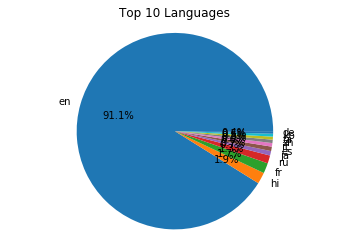

In [25]:
# Lets visualize the proportions that top 10 languages take with a pie chart
plt.pie(top10_languages.values(), labels=top10_languages.keys(), autopct='%1.1f%%')
plt.title("Top 10 Languages")
plt.axis("equal")
plt.show()

That wasn't a very useful interpretation of the chart, maybe it will be more insightful if we exclude movies made in English. And since it is not easily interpretable which language the 2 letter abbreviation is, we can hard code values

{'hi': 99, 'fr': 89, 'ru': 69, 'ja': 39, 'es': 38, 'it': 31, 'zh': 29, 'ta': 26, 'ko': 25, 'de': 22}


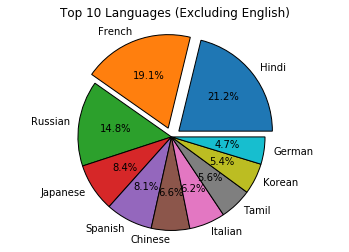

In [26]:
other_languages = top10_languages
del other_languages['en']
print(other_languages)
language_kv = {'hi':'Hindi', 'fr':'French', 'ru':'Russian', 'ja':'Japanese', 'es':'Spanish', 'zh':'Chinese',
               'it':'Italian', 'ta':'Tamil', 'ko':'Korean', 'de':'German'}

explode = [0.1,0.1,0,0,0,0,0,0,0,0]
plt.pie(other_languages.values(), labels=language_kv.values(), autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
        explode=explode)
plt.title("Top 10 Languages (Excluding English)")
plt.axis("equal")
plt.show()